In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format
# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv("C:/Users/abhin/Life_Expectancy.csv")

In [3]:
df.head(5)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


Data description -
Country name 
status - country is developed or not 
Adult Mortality- how much die in age btw 15-60 in one day with measure of 10000 maybe 
Infant death - children die in one day in 10000 




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [5]:
df.describe()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,160.475806,27.637097,85.104839,2841.637097,41.733871,36.798387,86.637097,87.919355,0.819355,6866.816502,19606036.048387,4.180645,4.373387,0.690685,13.085484,71.220968
std,101.794506,94.347510,20.839229,11517.586950,21.186385,122.248912,21.653342,19.122879,1.764127,10885.243579,41007621.897546,4.086736,4.212797,0.168296,2.909242,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8381.000000,0.300000,0.200000,0.332000,5.300000,48.600000
25%,73.500000,1.000000,82.000000,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,821556.000000,1.500000,1.575000,0.551500,10.875000,65.175000
50%,139.500000,10.000000,94.000000,37.000000,54.100000,12.000000,95.000000,95.000000,0.100000,2728.291765,4234054.000000,2.400000,2.800000,0.740000,13.300000,72.200000
75%,234.000000,21.000000,97.000000,588.750000,59.750000,26.500000,98.000000,98.000000,0.400000,8437.562893,14827671.000000,6.425000,6.425000,0.799000,15.000000,77.500000
max,438.000000,910.000000,99.000000,90387.000000,71.400000,1100.000000,99.000000,99.000000,8.100000,56554.387600,258162113.000000,26.700000,27.300000,0.945000,20.400000,86.000000


In [6]:
df.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

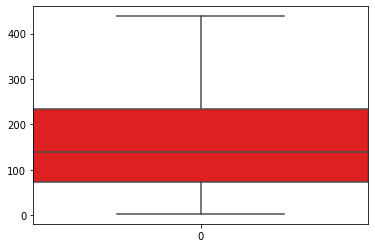

In [7]:
plt.figsize=(30,10)
sns.boxplot(data=df['Adult_Mortality'],color='r',width=1) ##checking outlier for iten weight ,here no outlier cuz no dotes are 
plt.show 

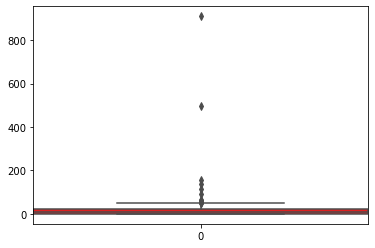

In [8]:
plt.figsize=(100,50)
sns.boxplot(data=df['Infant_Deaths'],color='r',width=1)  
plt.show()   

# OLS Model

# 2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?

In [9]:
x=df["Income_Index"]  ##ordinal list square
x=sm.add_constant(x)
y=df["Expected"]
model1=sm.OLS(y,x).fit()
np.mean(model1.resid)

-2.378026091455174e-14

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.13e-34
Time:                        12:06:43   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Analyze the impact of immunization on life expectancy.

In [11]:
x=df.iloc[:,[3,4,8]]
x

,Infant_Deaths,Hepatitis,Polio
0,62,65,6
1,0,98,98
2,21,95,95
3,66,64,7
4,8,94,93
5,1,94,96
6,1,93,93
7,0,93,93
8,5,96,98
9,0,98,98


In [12]:
x=df.iloc[:,[3,4,8]]
x=sm.add_constant(x)
y=df["Expected"]
model2=sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6.313
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           0.000518
Time:                        12:06:43   Log-Likelihood:                -431.26
No. Observations:                 124   AIC:                             870.5
Df Residuals:                     120   BIC:                             881.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.2927      3.482     17.604      0.000      54.399      68.186
Infant_Deaths    -0.0148      0.008     -1.912      0.058      -0.030       0.001
Hepatitis         0.0017      0.041      0.041      0.967      -0.079       0.082
Polio             0.1177      0.039      2.983      0.003       0.040       0.196
==============================================================================
Omnibus:                        4.799   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.681
Skew:                          -0.428   Prob(JB):                       0.0963
Kurtosis:                       2.584   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?


As status has two values ,Developed and developing ,so we need to encode this by Dummy encoding

In [13]:
df["developing"]=pd.get_dummies(df["Status"],drop_first=True)


In [14]:
x=df.iloc[:,[4,8,18]]
x=sm.add_constant(x)
y=df["Expected"]
model3=sm.OLS(y,x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     18.73
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           4.98e-10
Time:                        12:06:43   Log-Likelihood:                -416.54
No. Observations:                 124   AIC:                             841.1
Df Residuals:                     120   BIC:                             852.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6351      3.503     20.163      0.000      63.699      77.571
Hepatitis      0.0274      0.036      0.756      0.451      -0.044       0.099
Polio          0.0864      0.035      2.443      0.016       0.016       0.156
developing   -10.9071      1.798     -6.066      0.000     -14.467      -7.347
==============================================================================
Omnibus:                        3.122   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.732
Skew:                          -0.359   Prob(JB):                        0.255
Kurtosis:                       3.116   Cond. No.                         713.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.

In [15]:
df['developing']=pd.get_dummies (df["Status"],drop_first=True)
x=df.iloc[:,2:16]## here column statr is 1 and column end is 16
x=sm.add_constant(x)
y=df["Expected"]
mlr_model=sm.OLS(y,x).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     40.98
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.12e-37
Time:                        12:06:43   Log-Likelihood:                -326.60
No. Observations:                 124   AIC:                             683.2
Df Residuals:                     109   BIC:                             725.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 57.6984      3.165     18.230      0.000      51.425      63.971
Adult_Mortality       -0.0241      0.004     -5.887      0.000      -0.032      -0.016
Infant_Deaths          0.0581      0.037      1.551      0.124      -0.016       0.132
Hepatitis              0.0574      0.032      1.807      0.074      -0.006       0.120
Measles            -6.927e-05   6.16e-05     -1.125      0.263      -0.000    5.27e-05
 BMI                  -0.0299      0.023     -1.323      0.189      -0.075       0.015
Underfive_Deaths      -0.0399      0.027     -1.453      0.149      -0.094       0.015
Polio                 -0.0154      0.022     -0.695      0.489      -0.059       0.028
Diphtheria            -0.0186      0.040     -0.468      0.641      -0.098       0.060
 HIV                  -0.9228      0.265     -3.477      0.001      -1.449      -0.397
GDP                 5.878e-05   3.51e-05      1.672      0.097   -1.09e-05       0.000
Population         -2.195e-08   8.61e-09     -2.549      0.012    -3.9e-08   -4.89e-09
Malnourished10_19     -0.4905      0.301     -1.631      0.106      -1.087       0.106
Malnourished5_9        0.2701      0.283      0.955      0.342      -0.290       0.831
Income_Index          26.6954      4.070      6.560      0.000      18.630      34.761
==============================================================================
Omnibus:                        7.705   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.652
Skew:                           0.075   Prob(JB):                     0.000658
Kurtosis:                       4.677   Cond. No.                     6.74e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df


,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,developing
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000,1
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000,1
5,Armenia,Developing,118,1,94,33,54.900000,1,96,94,0.100000,369.654776,291695,2.100000,2.200000,0.741000,12.700000,74.800000,1
6,Australia,Developed,59,1,93,74,66.600000,1,93,93,0.100000,56554.387600,23789338,0.600000,0.600000,0.937000,20.400000,82.800000,0
7,Austria,Developed,65,0,93,309,57.600000,0,93,93,0.100000,43665.947000,8633169,1.900000,2.100000,0.892000,15.900000,81.500000,0
8,Azerbaijan,Developing,118,5,96,0,52.500000,6,98,96,0.100000,55.313820,9649341,2.800000,2.900000,0.758000,12.700000,72.700000,1
9,Bahrain,Developing,69,0,98,0,63.600000,0,98,98,0.100000,22688.878240,1378188,6.200000,6.100000,0.823000,14.500000,76.900000,1


# 6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.

In [17]:
X = df.iloc[:,[10,14]]
X = sm.add_constant(X)
y = df['Expected']
MLR_model = sm.OLS(y,X).fit()
#predicted = MLR_model.predict(X)
predicted = MLR_model.fittedvalues
ssr = np.sum((predicted - y.mean())**2)
print("SSR:",ssr)
sse = np.sum((y - predicted)**2)
print("SSE:",sse)
print("SST:",(sse+ssr))

SSR: 4829.204158161043
SSE: 3990.601325709945
SST: 8819.805483870987


# 13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ?

In [25]:
df_FEV = pd.read_csv("C:/Users/abhin/LungCapdata.csv")
df_FEV.head(2)





,Age,Height,Gender,Smoke,FEV
0,9,57.000000,0,0,1.708000
1,8,67.500000,0,0,1.724000


About the data set (Respiratory function data)
Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function.
Attribute information:

Age: Age in years

Height: Height in inches

Gender: Gender value is 1 if male 0 if female

Smoke: Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

FEV: Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

In [36]:
X = df_FEV.drop('FEV',axis = 1)
y = df_FEV['FEV']


In [32]:
x = df_FEV.iloc[:,:-1]
x = sm.add_constant(x)
vif = pd.DataFrame()


In [33]:
vif['VIF_Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Feature'] = x.columns

print(vif)

   VIF_Factor Feature
0  191.122030   const
1    3.019010     Age
2    2.829728  Height
3    1.060228  Gender
4    1.209564   Smoke


# 15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?

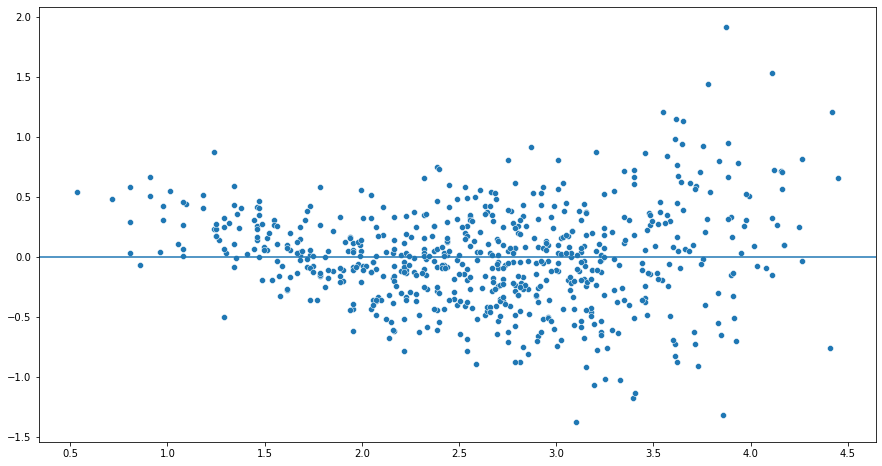

In [39]:
X = df_FEV.drop(["FEV"], axis =1)
y = df_FEV['FEV']

X_intercept = sm.add_constant(X)
MLR_model = sm.OLS(y,X_intercept).fit()

residuals = MLR_model.resid
fitted_values = MLR_model.fittedvalues

plt.figure(figsize = (15,8))

sns.scatterplot(fitted_values, residuals)
plt.axhline(0)

# 16. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?

In [38]:
X = df_FEV.drop(["FEV"], axis =1)
y = df_FEV['FEV']

X_intercept = sm.add_constant(X)
MLR_model = sm.OLS(y,X_intercept).fit()

residuals = MLR_model.resid
durbin_watson(residuals)

1.6452015855915543

# 17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed.

In [41]:
X = df_FEV.drop(["FEV"], axis =1)
y = df_FEV['FEV']

X_intercept = sm.add_constant(X)
MLR_model = sm.OLS(y,X_intercept).fit()

residuals = MLR_model.resid
stats.shapiro(residuals)

ShapiroResult(statistic=0.9900586009025574, pvalue=0.00021029058552812785)

# 18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df_FEV.drop('FEV',axis=1)
y=df_FEV['FEV']




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Model evaluation metrics

r_squared = r2_score(y_test, y_pred)
print("R2", r_squared)

mse = mean_squared_error(y_test, y_pred)
print("MSE",mse)

rmse=np.sqrt(mse)
print("RMSE",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE",mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
#mape = np.mean(np.abs(y_test-y_pred) / np.abs(y_test))
print("MAPE",mape)

R2 0.7545793744233386
MSE 0.16424582929476997
RMSE 0.40527253705965566
MAE 0.31057549458669326
MAPE 0.12206878316622724
